In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import json
import time
import sys


In [2]:
adata = sc.read('integrated_final.h5ad')
adata_emb = sc.read('integrated_final_emb.h5ad')

<AxesSubplot:xlabel='norm', ylabel='Count'>

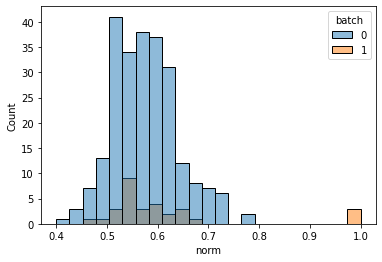

In [3]:
d=pd.DataFrame({'norm':np.linalg.norm(adata_emb.X, axis=1), 'batch': adata_emb.obs.batch.values})
sns.histplot(x='norm', hue='batch', data=d)

In [4]:
d

,norm,batch
0,0.696362,0
1,0.589191,0
2,0.597586,0
3,0.611714,0
4,0.534443,0
...,...,...
265,1.000000,1
266,0.609553,0
267,0.620695,0
268,0.591296,0


In [5]:
adata.obs['query'] = adata.obs['query'].astype('category')

<ipython-input-6-c56bd27890e0>:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_noland.obs['classifier_outcome'] = adata_noland.obs['classifier_outcome'].astype(str)
<ipython-input-6-c56bd27890e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_noland.obs['predicted.celltype.l1_pred'][adata_noland.obs['predicted.celltype.l1_pred'] == 'nan'] = 'Reference'
/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


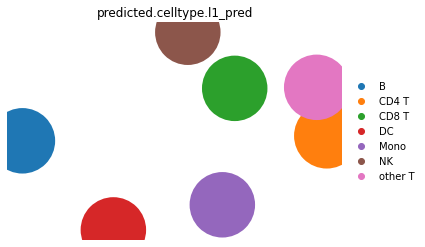

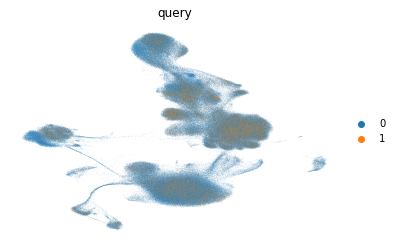

In [6]:
adata_noland = adata[adata.obs['query'].isin(['0', '1'])]
adata_noland.obs['classifier_outcome'] = adata_noland.obs['classifier_outcome'].astype(str)
adata_noland.obs['predicted.celltype.l1_pred'] = adata_noland.obs['predicted.celltype.l1_pred'].astype(str)
adata_noland.obs['predicted.celltype.l1_pred'][adata_noland.obs['predicted.celltype.l1_pred'] == 'nan'] = 'Reference'
adata_land = adata[adata.obs['query'].isin(['2'])]
sc.pl.umap(adata_land, color='predicted.celltype.l1_pred', frameon=False)
sc.pl.umap(adata_noland, color='query', frameon=False)

In [7]:
palette_dict = dict(zip(adata_land.obs['predicted.celltype.l1_pred'].cat.categories, adata_land.uns['predicted.celltype.l1_pred_colors']))
palette_dict['reference'] = '#d3d3d3'

In [8]:
adata.obs['predicted.celltype.l1_pred'] = adata.obs['predicted.celltype.l1_pred'].astype('category')

In [9]:
adata_noland

AnnData object with n_obs × n_vars = 559517 × 30
    obs: 'dataset', 'tissue', 'sample_type', 'sample_type_note', 'patient', 'sample', 'race_reported', 'sex', 'age', 'disease_status', 'disease_severity', 'days_since_symptom_onset', 'predicted.celltype.l1', 'predicted.celltype.l2', 'predicted.celltype.l3', 'predicted.celltype.l1.score', 'predicted.celltype.l2.score', 'predicted.celltype.l3.score', 'mapping.score', 'trvae_size_factors', 'trvae_labeled', 'predicted.celltype.l1_pred', 'predicted.celltype.l1_prob', 'classifier_outcome', 'condition', 'query'
    uns: 'neighbors', 'umap', 'query_colors'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

Text(0.5, 1.0, '')

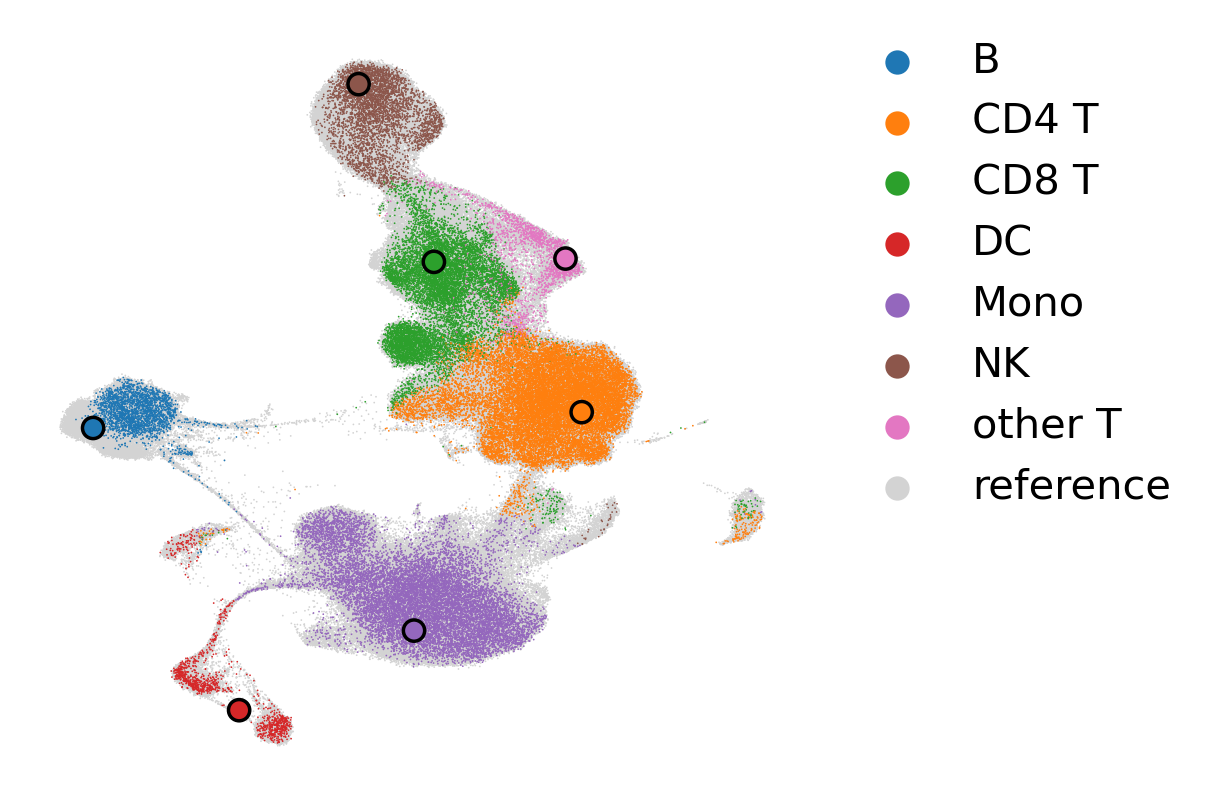

In [10]:
plt.rcParams['figure.dpi'] = 250
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sc.pl.umap(
    adata_noland, 
    color='predicted.celltype.l1_pred',
    show=False, 
    ax=ax, 
    size=1,
    frameon=False,
    palette=palette_dict
)
sc.pl.umap(
    adata[adata.obs['query'].isin(['2'])], 
    color='predicted.celltype.l1_pred',
    palette=palette_dict,
    ax=ax,
    size=150, 
    edgecolor='black', 
    show=False
)
h, l = ax.get_legend_handles_labels()
ax.legend(handles = h[:8], labels = l[:8], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12, ncol=1, frameon=False)
ax.set_title('')
#fig.savefig('figure_hlca/healthy_pred_umap.png', dpi=500, bbox_inches='tight')

Text(0.5, 1.0, '')

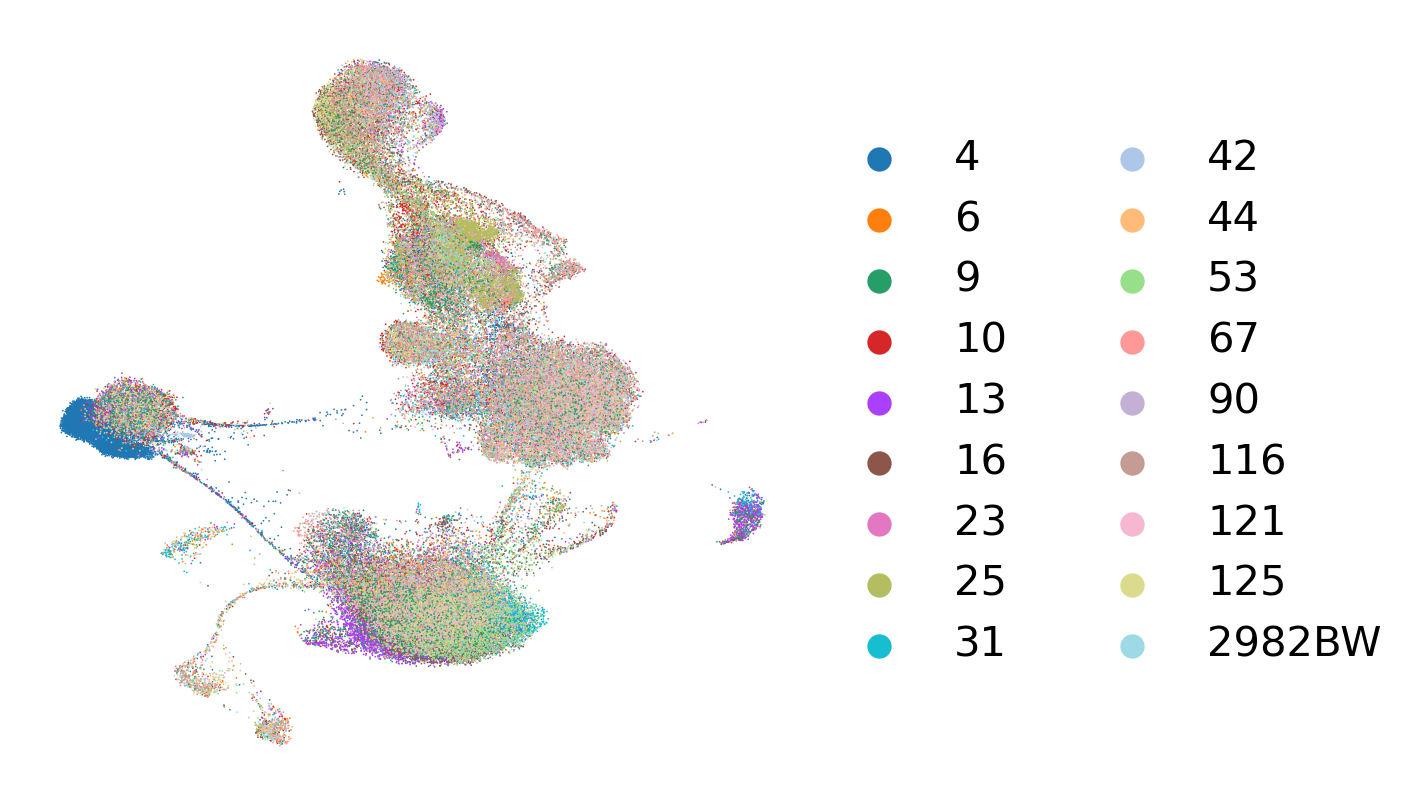

In [11]:
plt.rcParams['figure.dpi'] = 250
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sc.pl.umap(
    adata_noland[adata_noland.obs.patient.isin(adata_noland.obs.patient.sample(20, random_state=42))], 
    color='patient',
    show=False, 
    ax=ax, 
    size=1,
    frameon=False,
    legend_fontsize=12
    #palette=palette_dict
)
h, l = ax.get_legend_handles_labels()
#ax.legend(handles = h[:8], labels = l[:8], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=9, ncol=1, frameon=False)
ax.set_title('')
#fig.savefig('figure_hlca/healthy_pred_umap.png', dpi=500, bbox_inches='tight')

Text(0.5, 1.0, '')

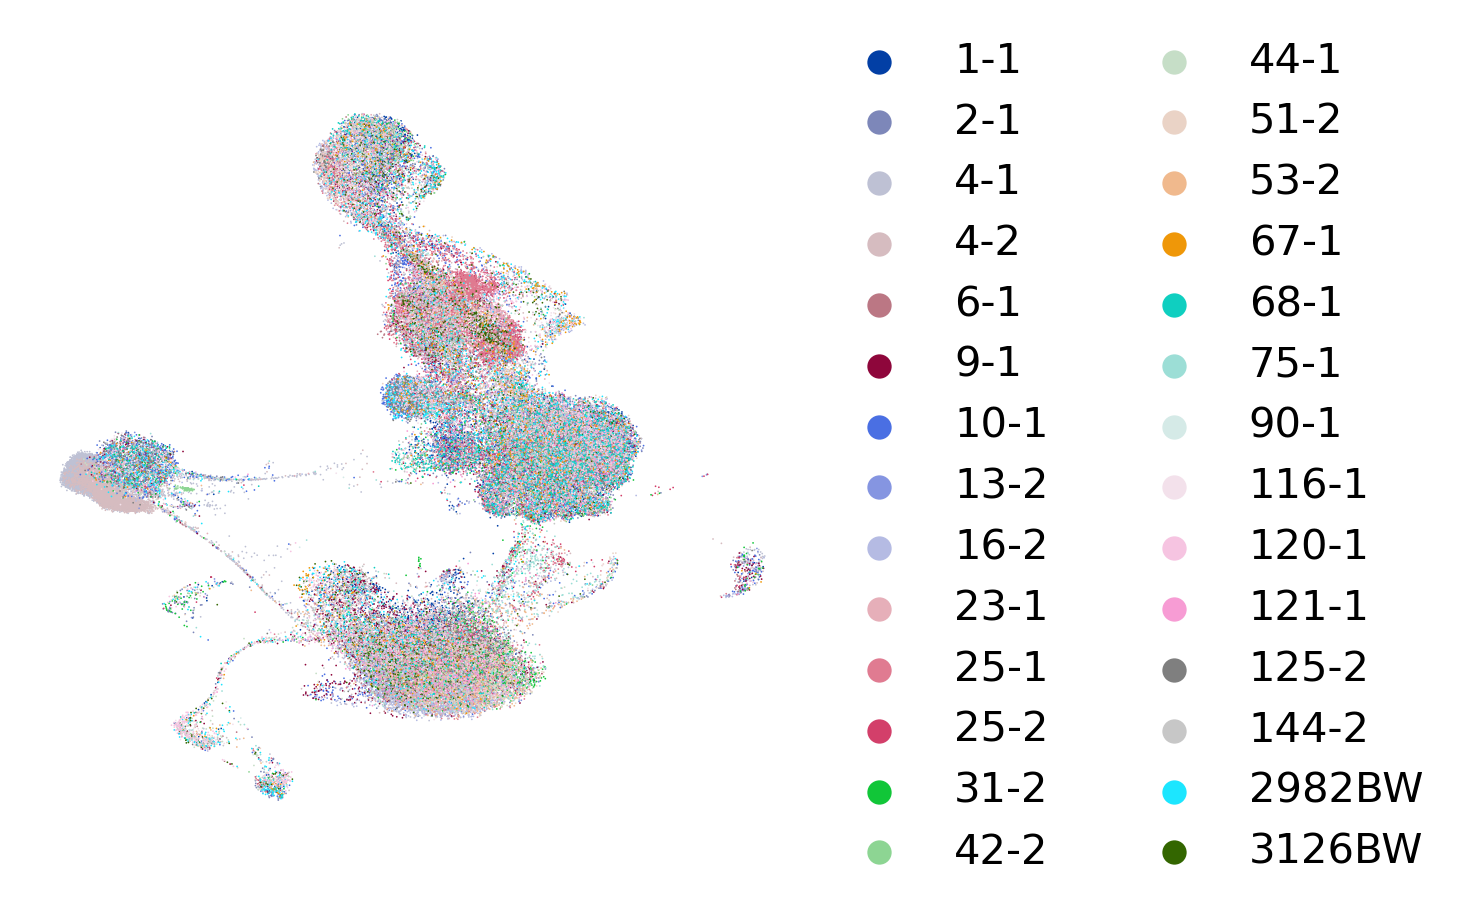

In [12]:
plt.rcParams['figure.dpi'] = 250
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sc.pl.umap(
    adata_noland[adata_noland.obs['sample'].isin(adata_noland.obs['sample'].sample(30, random_state=42))], 
    color='sample',
    show=False, 
    ax=ax, 
    size=1,
    frameon=False,
    legend_fontsize=12
    #palette=palette_dict
)
h, l = ax.get_legend_handles_labels()
#ax.legend(handles = h[:8], labels = l[:8], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=9, ncol=1, frameon=False)
ax.set_title('')
#fig.savefig('figure_hlca/healthy_pred_umap.png', dpi=500, bbox_inches='tight')

In [13]:
adata_emb.obs['disease_coarse'] = adata_emb.obs['disease_severity'].astype('string')
adata_emb.obs['disease_coarse'][adata_emb.obs['disease_severity'].isin(['healthy', 'mild'])] = 'healthy - mild'
adata_emb.obs['disease_coarse'][~adata_emb.obs['disease_severity'].isin(['healthy', 'mild'])] = 'moderate - severe'                             
adata_emb.obs['disease_coarse'] = adata_emb.obs['disease_coarse'].astype('category')

In [14]:
adata_emb.obs.groupby('batch').size()

batch
0    240
1     30
dtype: int64

In [15]:
import anndata2ri
import rpy2
from rpy2.robjects import r

anndata2ri.activate()
%load_ext rpy2.ipython

In [16]:
obs = adata_emb[adata_emb.obs['batch']=='0'].obs

In [17]:
disease_severity = obs['disease_severity'].astype(str).values

In [18]:
%%R -i disease_severity

disease_severity_ord = ordered(disease_severity)
disease_severity_n = as.factor(disease_severity)
disease_severity_ord_n = as.factor(disease_severity_ord)
print(disease_severity_n)

  [1] healthy  healthy  moderate moderate severe   severe   moderate moderate
  [9] severe   moderate moderate moderate moderate moderate moderate moderate
 [17] severe   severe   moderate severe   moderate healthy  healthy  healthy 
 [25] healthy  mild     moderate severe   moderate severe   severe   moderate
 [33] severe   moderate moderate moderate moderate moderate moderate moderate
 [41] moderate mild     severe   moderate severe   severe   moderate moderate
 [49] severe   severe   moderate severe   mild     mild     mild     mild    
 [57] moderate mild     mild     moderate mild     mild     mild     mild    
 [65] mild     mild     mild     mild     mild     mild     mild     mild    
 [73] mild     mild     moderate moderate moderate severe   severe   severe  
 [81] severe   moderate severe   severe   moderate moderate mild     moderate
 [89] moderate moderate severe   severe   severe   severe   moderate moderate
 [97] moderate mild     moderate moderate mild     mild     mode

In [19]:
pc1_scores =  adata_emb[adata_emb.obs['batch']=='0'].obsm['X_pca'][:,0]
pc2_scores =  adata_emb[adata_emb.obs['batch']=='0'].obsm['X_pca'][:,1]

In [20]:
%%R -i pc1_scores

model <- lm(pc1_scores ~ disease_severity_n)
print(summary(model))

model <- lm(pc1_scores ~ disease_severity_ord_n)
print(summary(model))


Call:
lm(formula = pc1_scores ~ disease_severity_n)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.47268 -0.11048 -0.00546  0.11132  0.45422 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -0.004292   0.040571  -0.106 0.915846    
disease_severity_nmild     -0.146289   0.043657  -3.351 0.000938 ***
disease_severity_nmoderate  0.097791   0.044127   2.216 0.027636 *  
disease_severity_nsevere    0.164268   0.046480   3.534 0.000492 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1571 on 236 degrees of freedom
Multiple R-squared:  0.4128,	Adjusted R-squared:  0.4053 
F-statistic: 55.29 on 3 and 236 DF,  p-value: < 2.2e-16


Call:
lm(formula = pc1_scores ~ disease_severity_ord_n)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.47268 -0.11048 -0.00546  0.11132  0.45422 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    


In [21]:
%%R -i pc2_scores

model <- lm(pc2_scores ~ disease_severity_n)
print(summary(model))


Call:
lm(formula = pc2_scores ~ disease_severity_n)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45083 -0.12710  0.02354  0.10020  0.49713 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -0.23645    0.04727  -5.002 1.11e-06 ***
disease_severity_nmild      0.21121    0.05086   4.152 4.60e-05 ***
disease_severity_nmoderate  0.27466    0.05141   5.342 2.16e-07 ***
disease_severity_nsevere    0.33385    0.05415   6.165 3.03e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1831 on 236 degrees of freedom
Multiple R-squared:  0.1558,	Adjusted R-squared:  0.1451 
F-statistic: 14.52 on 3 and 236 DF,  p-value: 1.038e-08



In [22]:
adata_emb_align = adata_emb.copy()
#sc.pp.regress_out(adata_emb_align, 'batch')

In [23]:
X_train = adata_emb_align.X[adata_emb_align.obs['batch']=='0']
X_test = adata_emb_align.X[adata_emb_align.obs['batch']=='1']

y_train = adata_emb.obs['disease_severity'][adata_emb.obs['batch']=='0'].values
y_test = adata_emb.obs['disease_severity'][adata_emb.obs['batch']=='1'].values


In [24]:
X_train = adata_emb_align.X[adata_emb_align.obs['batch']=='0']
X_test = adata_emb_align.X[adata_emb_align.obs['batch']=='1']

y_train_coarse = adata_emb.obs['disease_coarse'][adata_emb.obs['batch']=='0'].values
y_test_coarse = adata_emb.obs['disease_coarse'][adata_emb.obs['batch']=='1'].values


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
clf = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 10)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(clf, param_grid, cv=10)
#fit model to data
knn_gscv.fit(X_train, y_train)
print(knn_gscv.best_params_)

{'n_neighbors': 5}


In [27]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
clf = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(clf, param_grid, cv=10)
#fit model to data
knn_gscv.fit(X_train, y_train_coarse)
print(knn_gscv.best_params_)

{'n_neighbors': 19}


In [28]:
clf = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=clf.classes_))

              precision    recall  f1-score   support

     healthy       0.00      0.00      0.00         1
        mild       0.82      0.93      0.87        15
    moderate       0.67      0.80      0.73        10
      severe       0.00      0.00      0.00         4

    accuracy                           0.73        30
   macro avg       0.37      0.43      0.40        30
weighted avg       0.63      0.73      0.68        30



/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [29]:
df = pd.DataFrame(classification_report(y_test, y_pred, target_names=clf.classes_, output_dict=True))
df = df.assign(model='scPoli')

/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [30]:
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train_coarse)
y_pred_coarse = clf.predict(X_test)
print(classification_report(y_test_coarse, y_pred_coarse, target_names=clf.classes_))

                   precision    recall  f1-score   support

   healthy - mild       0.93      0.81      0.87        16
moderate - severe       0.81      0.93      0.87        14

         accuracy                           0.87        30
        macro avg       0.87      0.87      0.87        30
     weighted avg       0.87      0.87      0.87        30



In [31]:
sc.pp.pca(adata_emb_align)
adata_emb.obsm['X_pca'] = adata_emb_align.obsm['X_pca']

In [38]:
adata_emb.obs['disease_pred'] = 'nan'
adata_emb.obs['disease_pred'][adata_emb.obs['batch'] == '1'] = y_pred
adata_emb.obs['disease_pred_outcome'] = (adata_emb.obs['disease_severity'] == adata_emb.obs['disease_pred'])
adata_emb.obs['disease_pred_outcome'] = adata_emb.obs['disease_pred_outcome'].astype('category')
adata_emb.obs['disease_pred_coarse'] = 'nan'
adata_emb.obs['disease_pred_coarse'][adata_emb.obs['batch'] == '1'] = y_pred_coarse
adata_emb.obs['disease_pred_coarse_outcome'] = (adata_emb.obs['disease_coarse'] == adata_emb.obs['disease_pred_coarse'])
adata_emb.obs['disease_pred_coarse_outcome'] = adata_emb.obs['disease_pred_coarse_outcome'].astype('category')

<ipython-input-38-d0008c2b1ab5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_emb.obs['disease_pred'][adata_emb.obs['batch'] == '1'] = y_pred
<ipython-input-38-d0008c2b1ab5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_emb.obs['disease_pred_coarse'][adata_emb.obs['batch'] == '1'] = y_pred_coarse


Text(0.5, 1.0, '')

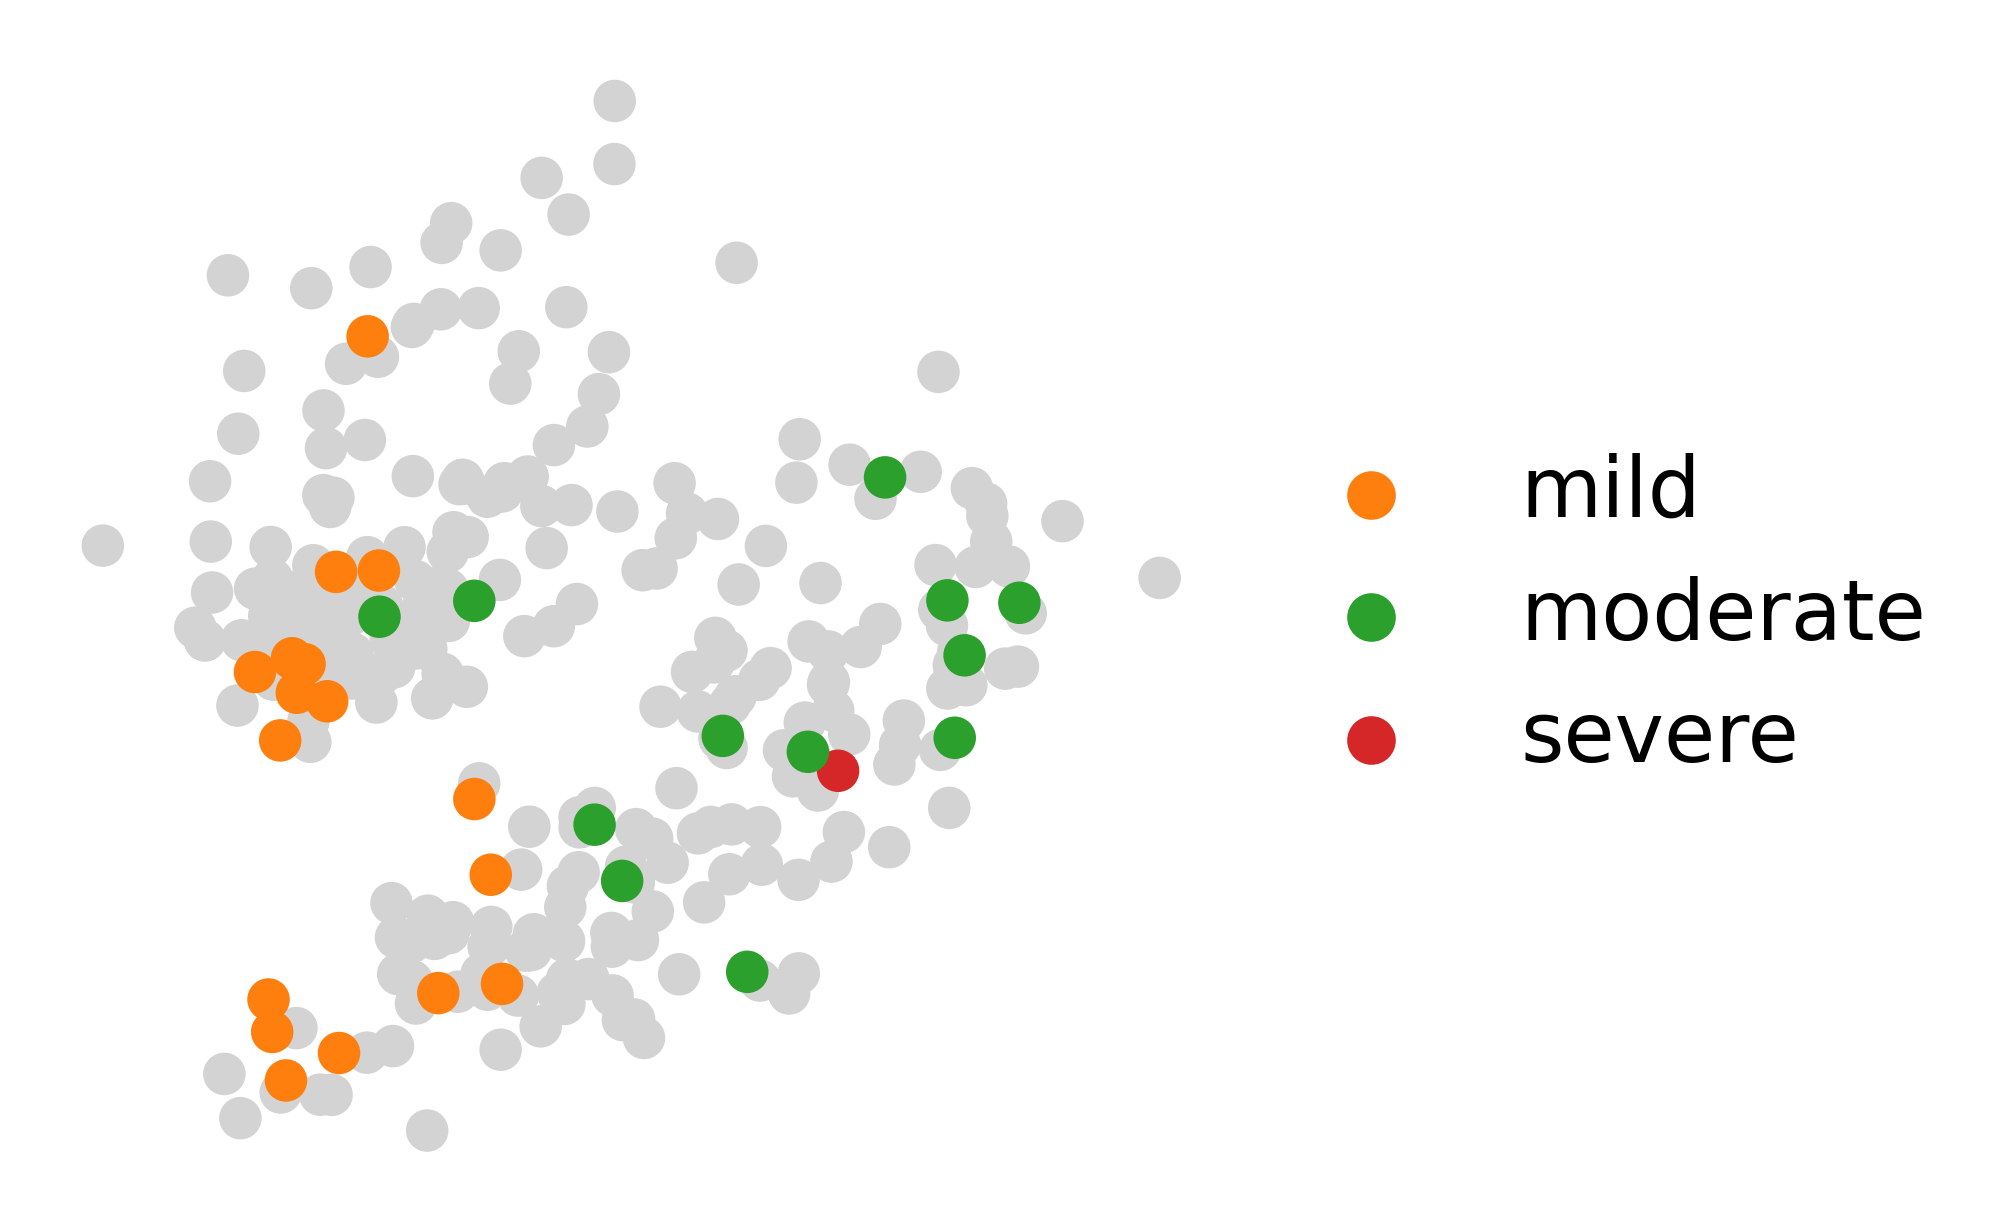

In [41]:
plt.rcParams['figure.dpi'] = 500
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
adata_emb.obs['disease_pred'] = adata_emb.obs['disease_pred'].astype('category')
sc.pl.pca(
    adata_emb[adata_emb.obs['batch']=='0'], 
    show=False, 
    ax=ax, 
    frameon=False,
    size=150,
)
sc.pl.pca(
    adata_emb[adata_emb.obs['batch']=='1'], 
    color='disease_pred',
    show=False, 
    ax=ax, 
    frameon=False,
    size=150,
    legend_fontsize=12,
    palette=sns.color_palette()[1:4]
)

#h, l = ax.get_legend_handles_labels()
#ax.legend(handles = h[:8], labels = l[:8], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12, ncol=1, frameon=False)
ax.set_title('')
#fig.savefig('figure_hlca/healthy_pred_umap.png', dpi=500, bbox_inches='tight')

Text(0.5, 1.0, '')

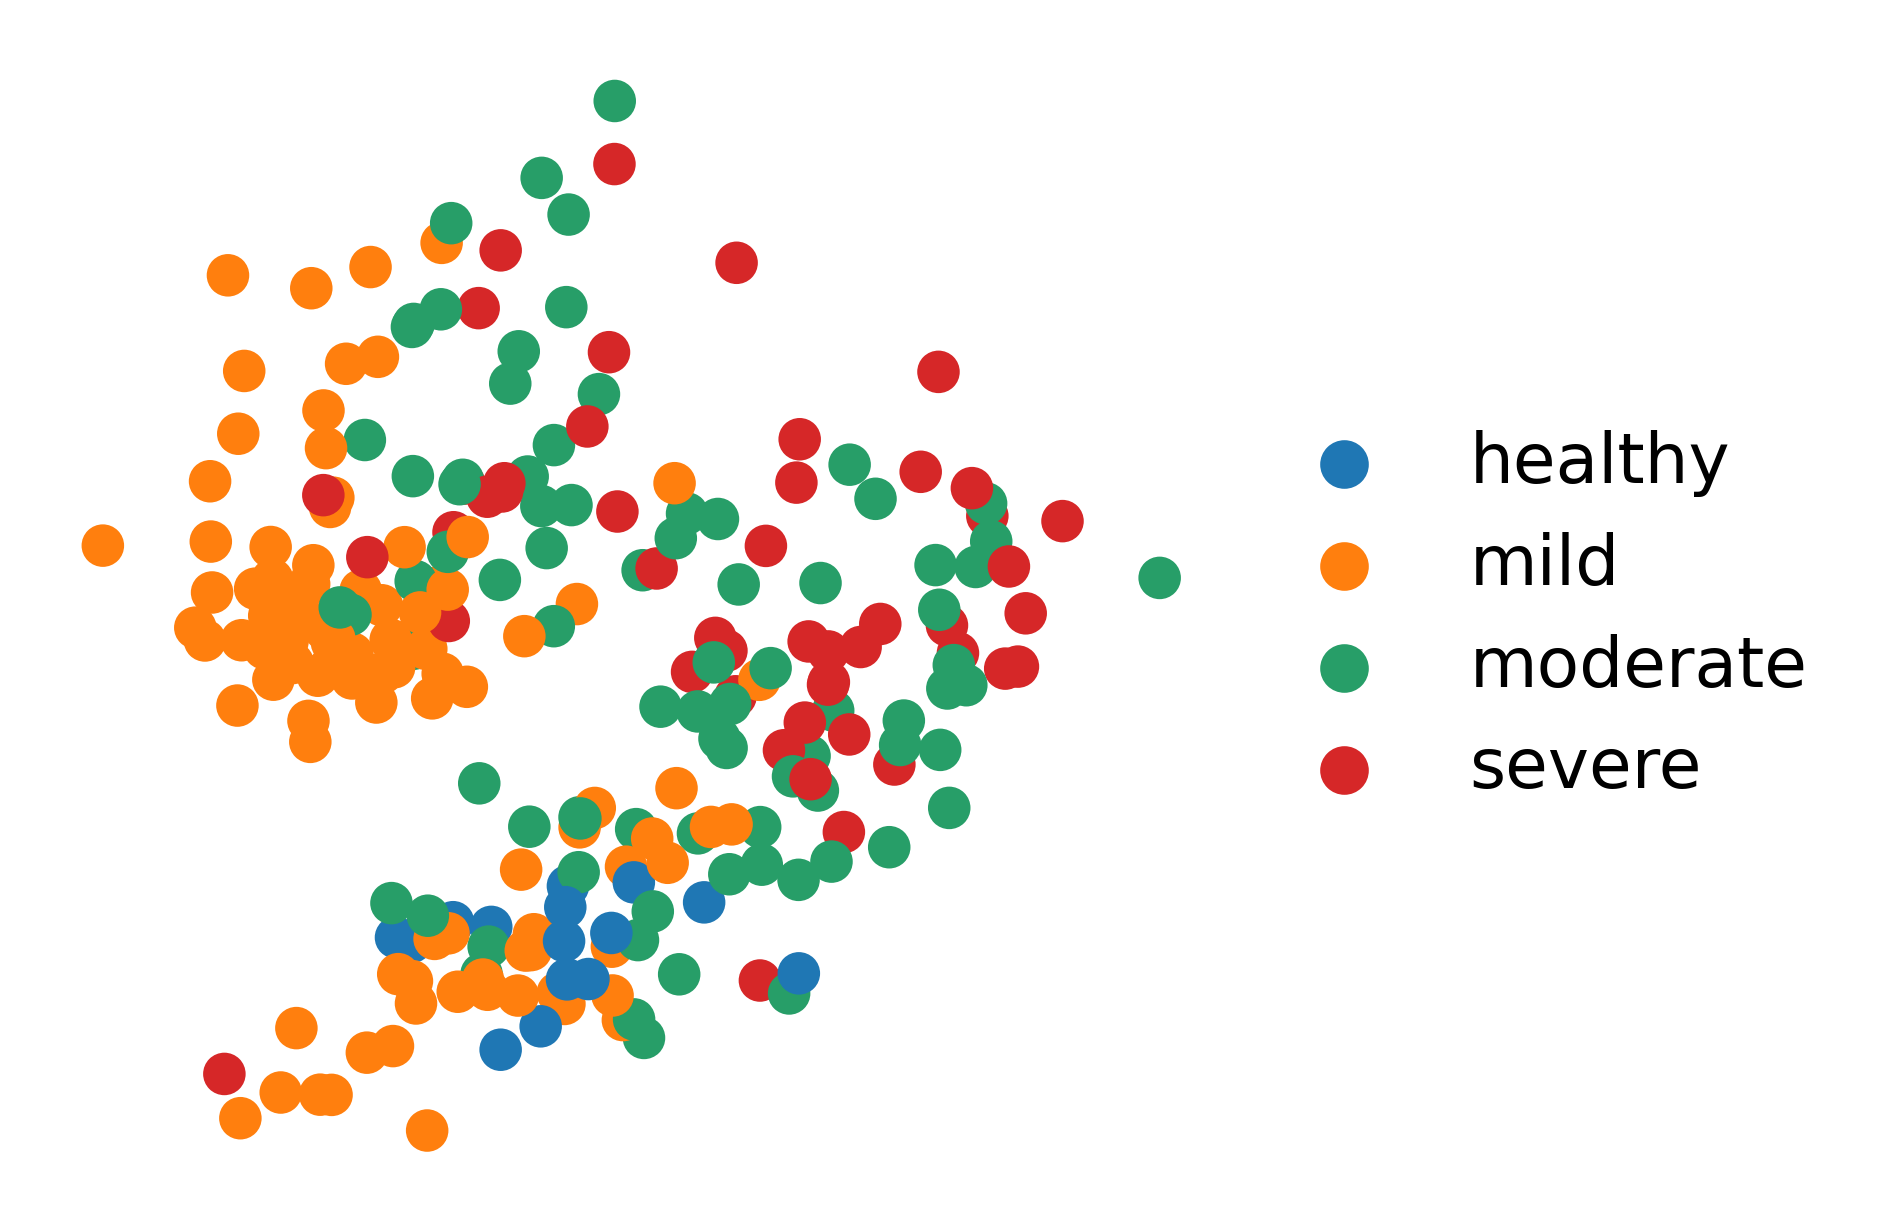

In [34]:
plt.rcParams['figure.dpi'] = 500
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
sc.pl.pca(
    adata_emb[adata_emb.obs['batch']=='0'], 
    color='disease_severity',
    show=False, 
    ax=ax, 
    frameon=False,
    size=150,
)
#h, l = ax.get_legend_handles_labels()
#ax.legend(handles = h[:8], labels = l[:8], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12, ncol=1, frameon=False)
ax.set_title('')
#fig.savefig('figure_hlca/healthy_pred_umap.png', dpi=500, bbox_inches='tight')

Text(0.5, 1.0, '')

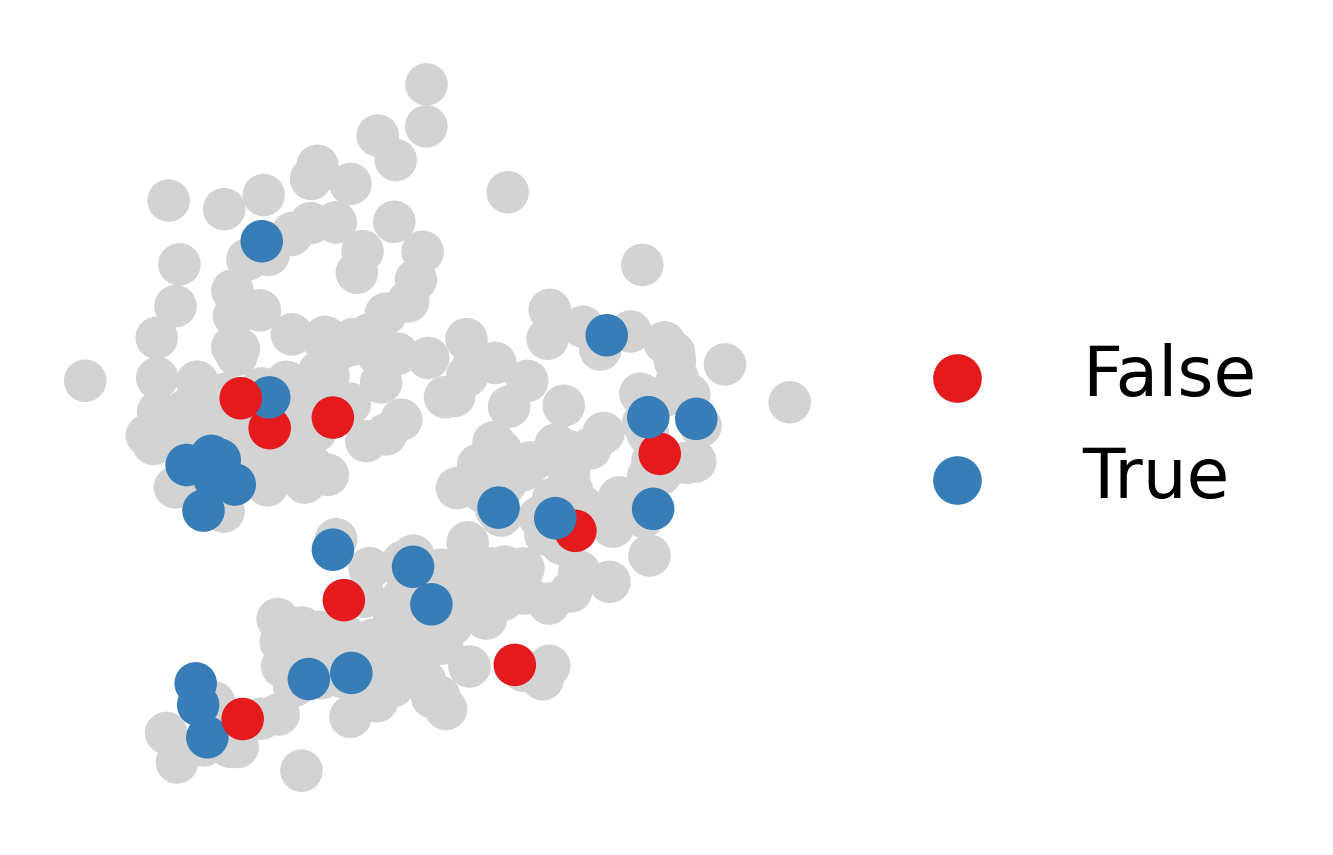

In [35]:
plt.rcParams['figure.dpi'] = 500
fig, ax = plt.subplots(1, 1, figsize=(2, 2))
sc.pl.pca(
    adata_emb[adata_emb.obs['batch']=='0'], 
    show=False, 
    ax=ax, 
    frameon=False,
    size=150,
)
sc.pl.pca(
    adata_emb[adata_emb.obs['batch']=='1'], 
    color='disease_pred_outcome',
    show=False, 
    ax=ax, 
    frameon=False,
    size=150,
    palette=sns.color_palette('Set1')
)

#h, l = ax.get_legend_handles_labels()
#ax.legend(handles = h[:8], labels = l[:8], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12, ncol=1, frameon=False)
ax.set_title('')
#fig.savefig('figure_hlca/healthy_pred_umap.png', dpi=500, bbox_inches='tight')

Text(0.5, 1.0, '')

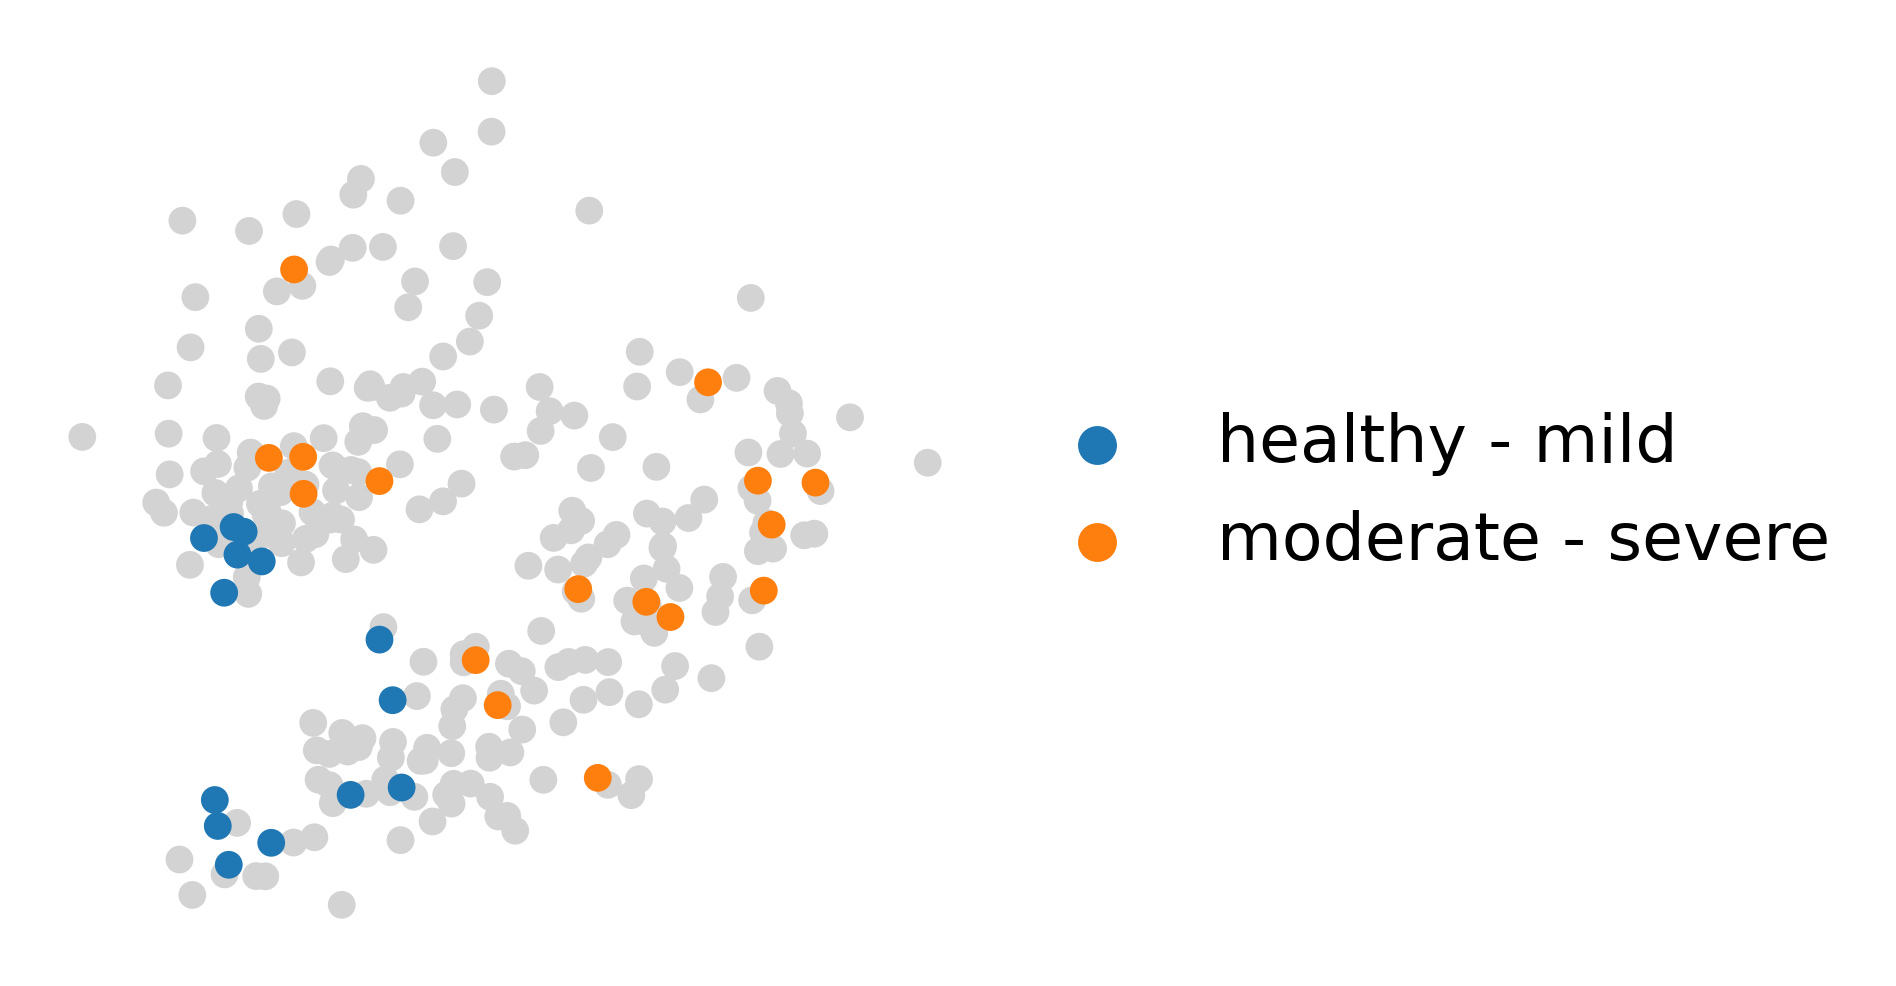

In [36]:
plt.rcParams['figure.dpi'] = 400
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
sc.pl.pca(
    adata_emb[adata_emb.obs['batch']=='0'], 
    show=False, 
    ax=ax, 
    frameon=False,
    size=100,
)
sc.pl.pca(
    adata_emb[adata_emb.obs['batch']=='1'], 
    color='disease_pred_coarse',
    show=False, 
    ax=ax, 
    frameon=False,
    size=100,
    legend_fontsize=12,
)

#h, l = ax.get_legend_handles_labels()
#ax.legend(handles = h[:8], labels = l[:8], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12, ncol=1, frameon=False)
ax.set_title('')
#fig.savefig('figure_hlca/healthy_pred_umap.png', dpi=500, bbox_inches='tight')

Text(0.5, 1.0, '')

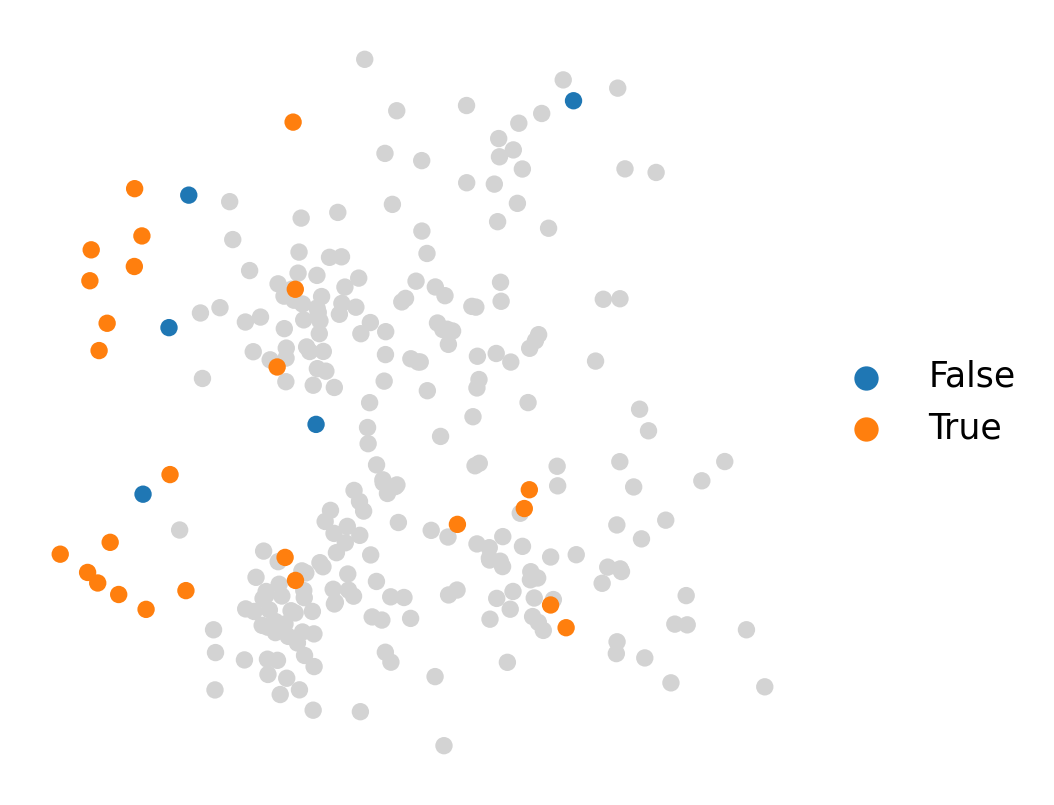

In [37]:
plt.rcParams['figure.dpi'] = 250
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sc.pl.pca(
    adata_emb[adata_emb.obs['batch']=='0'], 
    show=False, 
    ax=ax, 
    frameon=False,
    size=100,
)
sc.pl.pca(
    adata_emb[adata_emb.obs['batch']=='1'], 
    color='disease_pred_coarse_outcome',
    show=False, 
    ax=ax, 
    frameon=False,
    size=100,
)

#h, l = ax.get_legend_handles_labels()
#ax.legend(handles = h[:8], labels = l[:8], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12, ncol=1, frameon=False)
ax.set_title('')
#fig.savefig('figure_hlca/healthy_pred_umap.png', dpi=500, bbox_inches='tight')

In [ ]:
sc.pl.pca(adata_emb_align, color='disease_severity')

In [ ]:
sc.tl.diffmap(adata_emb_align)
sc.tl.dpt(adata_emb_align)

In [ ]:
sc.pl.diffmap(adata_emb_align, color='disease_severity')

In [ ]:
sc.pl.diffmap(adata_emb_align, color='disease_severity', components='2,3')

In [6]:
adata_raw = sc.read(
    '../../data/su_2020_rna.h5ad'
)

In [7]:
fred_full_meta = pd.read_csv('/lustre/groups/ml01/workspace/hediyehzadeh.s/shared_data/multigrate_multimil/notebooks/covid19_datasets_metadata_fredhutch.csv', index_col = 0)
datasetkey = 'su_2020'
fred_meta = fred_full_meta[fred_full_meta.dataset == datasetkey]
adata_raw.obs = fred_meta
adata_raw = adata_raw[adata_raw.obs[f'predicted.celltype.l1'] != 'other']

/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (4,5,7,8,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
sc.pp.normalize_total(adata_raw)
sc.pp.log1p(adata_raw)
sc.pp.highly_variable_genes(adata_raw, n_top_genes=2000)

/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  view_to_actual(adata)


In [9]:
adata_raw.obs['sample'] = adata_raw.obs['sample'].astype('category')
res = pd.DataFrame(columns=adata_raw.var_names, index=adata_raw.obs['sample'].cat.categories)                                                                                                 

for clust in adata_raw.obs['sample'].cat.categories: 
    res.loc[clust] = adata_raw[adata_raw.obs['sample'].isin([clust]),:].X.mean(0)

In [10]:
adata_mean = sc.AnnData(res.values)
adata_mean.obs = adata_raw.obs.groupby('sample').first()

<ipython-input-10-c0387b97fe95>:1: FutureWarning: X.dtype being converted to np.float32 from object. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_mean = sc.AnnData(res.values)
/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    ['1-1', '1-2', '10-1', '10-2', '100-1']

    Inferred to be: categorical

  value_idx = self._prep_dim_index(value.index, attr)


In [11]:
adata_mean.obs = adata_emb.obs.reindex(adata_mean.obs.index)

In [40]:
np.random.seed(420)
sample_ref = np.random.choice(adata.obs['sample'].unique(), 200, replace=False)
adata_mean.obs['batch'] = '0'
adata_mean.obs['batch'][~adata_mean.obs.index.isin(sample_ref)] = '1'

<ipython-input-40-73550bf2eee7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_mean.obs['batch'][~adata_mean.obs.index.isin(sample_ref)] = '1'


In [41]:
X_train = adata_mean.X[adata_mean.obs['batch']=='0']
X_test = adata_mean.X[adata_mean.obs['batch']=='1']

y_train = adata_mean.obs['disease_severity'][adata_mean.obs['batch']=='0'].values
y_test = adata_mean.obs['disease_severity'][adata_mean.obs['batch']=='1'].values


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
clf = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=clf.classes_))

              precision    recall  f1-score   support

     healthy       1.00      0.75      0.86         4
        mild       0.84      0.93      0.89        29
    moderate       0.69      0.71      0.70        28
      severe       0.29      0.20      0.24        10

    accuracy                           0.73        71
   macro avg       0.70      0.65      0.67        71
weighted avg       0.71      0.73      0.72        71



In [16]:
df_mean = pd.DataFrame(classification_report(y_test, y_pred, target_names=clf.classes_, output_dict=True))
df_mean = df_mean.assign(model='mean GEXP')
df_full = pd.concat([df, df_mean])

/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

NameError: name 'df' is not defined

In [218]:
df_f1 = df_full.loc['f1-score']
df_f1 = df_f1[['accuracy', 'macro avg', 'weighted avg', 'model']]

In [229]:
df_melt = pd.melt(df_f1, id_vars='model')
df_melt
df_melt['variable'] = df_melt['variable'].map(
    {
        'accuracy': 'Accuracy',
        'macro avg': 'F1 (macro)',
        'weighted avg': 'F1 (weighted)'
    }
)

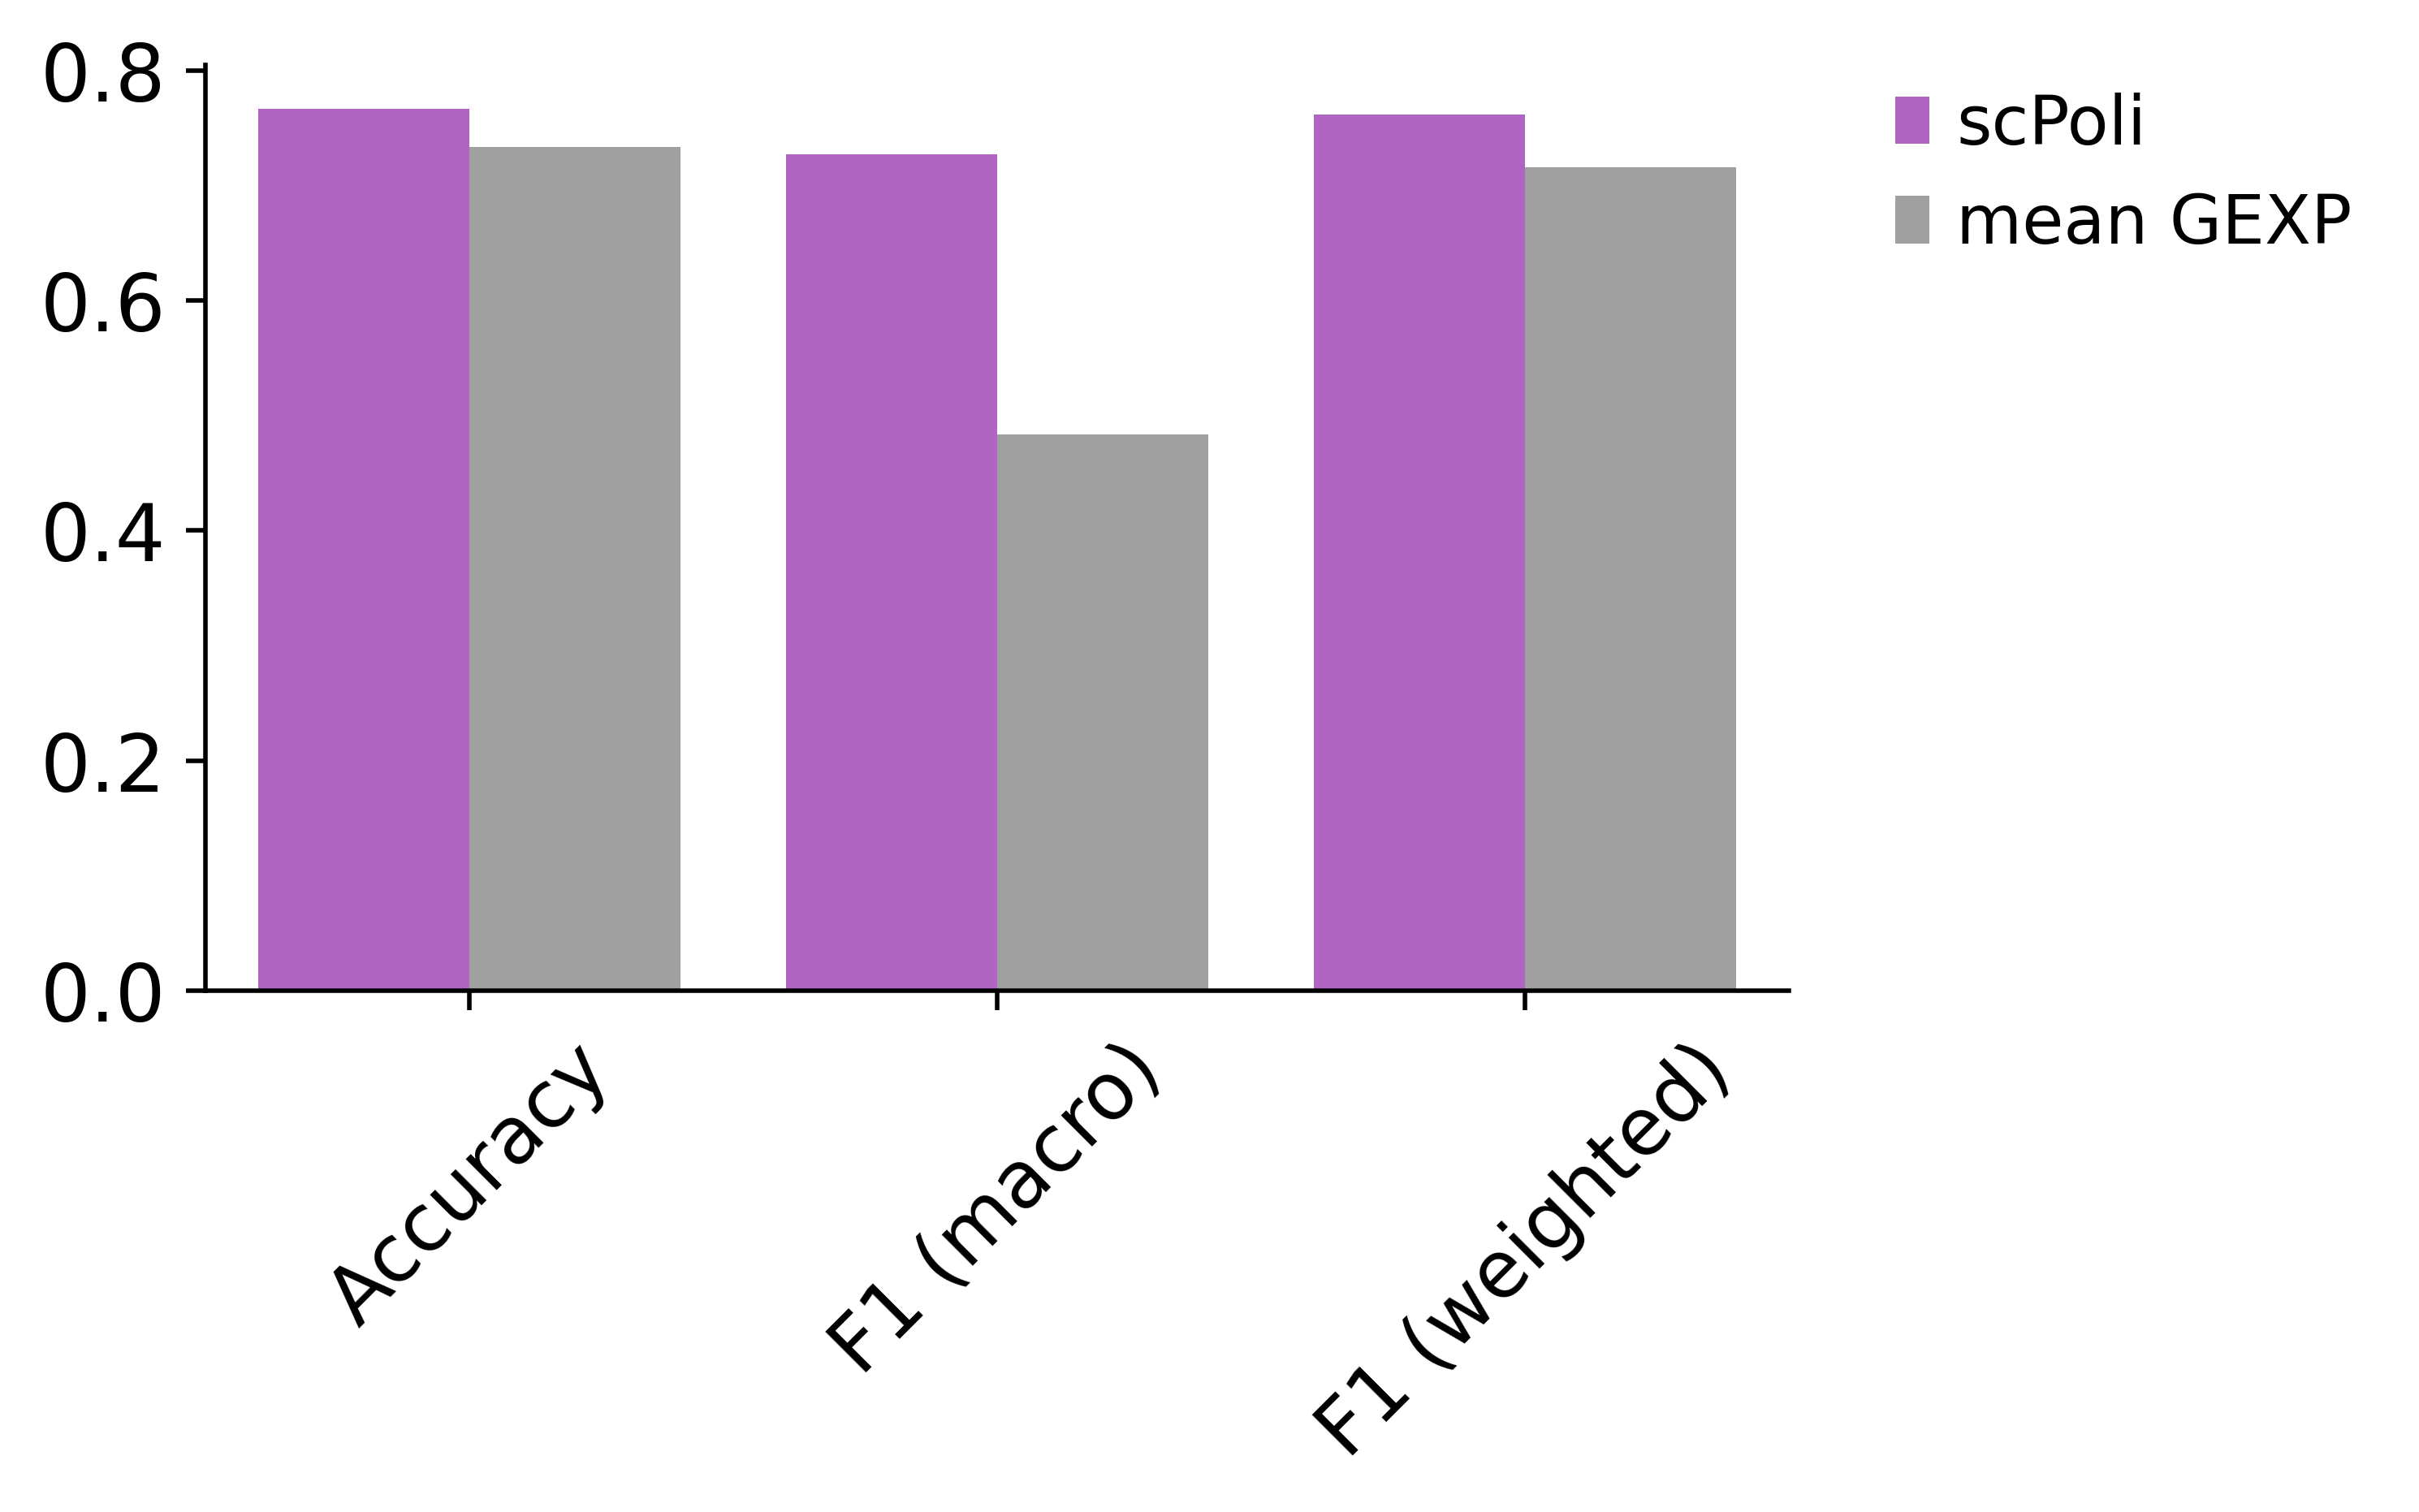

In [253]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
sns.barplot(x='variable', y='value', hue='model', data=df_melt, ax=ax,  palette=['#BA55D3', '#A0A0A0'])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12, ncol=1, frameon=False)
ax.grid(False)
l = ax.get_xticklabels()
ax.set_xlabel('')
ax.set_ylabel('')
sns.despine()
ax.set_xticklabels(l, rotation=45)
fig.savefig('accuracy_comparison.png', dpi=400, bbox_inches='tight')

In [254]:
df_melt

,model,variable,value
0,scPoli,Accuracy,0.766667
1,mean GEXP,Accuracy,0.733333
2,scPoli,F1 (macro),0.727385
3,mean GEXP,F1 (macro),0.483523
4,scPoli,F1 (weighted),0.762129
5,mean GEXP,F1 (weighted),0.716212


In [86]:
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train_coarse)
y_pred_coarse = clf.predict(X_test)
print(classification_report(y_test_coarse, y_pred_coarse, target_names=clf.classes_))

                   precision    recall  f1-score   support

   healthy - mild       0.94      0.94      0.94        16
moderate - severe       0.93      0.93      0.93        14

         accuracy                           0.93        30
        macro avg       0.93      0.93      0.93        30
     weighted avg       0.93      0.93      0.93        30

